# Sales Analysis

In [135]:
import pandas as pd
import os
from matplotlib import pyplot as p

## Merging 12 months of sales into single CSV file

In [7]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
files = [file for file in os.listdir('./Sales_Data')]
merge_file = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    merge_file = pd.concat([merge_file, df])
merge_file.to_csv('merge_file.csv', index=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13622 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          13579 non-null  object
 1   Product           13579 non-null  object
 2   Quantity Ordered  13579 non-null  object
 3   Price Each        13579 non-null  object
 4   Order Date        13579 non-null  object
 5   Purchase Address  13579 non-null  object
dtypes: object(6)
memory usage: 638.7+ KB


In [5]:
file = pd.read_csv('merge_file.csv')
file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
file = file.drop(file[file['Order Date'] == 'Order Date'].index)

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Find NaN Series

In [8]:
NaN = file[file.isna().any(axis=1)]
NaN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
file = file.dropna(how='all')
isNaN = file[file.isna().any(axis=1)]
isNaN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Add month column

In [10]:
file['Order Date']=pd.to_datetime(file['Order Date'])

In [11]:
file['Month'] = file['Order Date'].dt.month
file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


#### Add Revenue column

In [12]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.3+ MB


In [13]:
file['Quantity Ordered'] = pd.to_numeric(file['Quantity Ordered'])
file['Price Each'] = pd.to_numeric(file['Price Each'])
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


In [14]:
file['Revenue'] = file['Price Each'] * file['Quantity Ordered']
file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


### Question 1. What was the best month for sale? How much was earned  that month?

In [15]:
re = file.groupby('Month').sum()

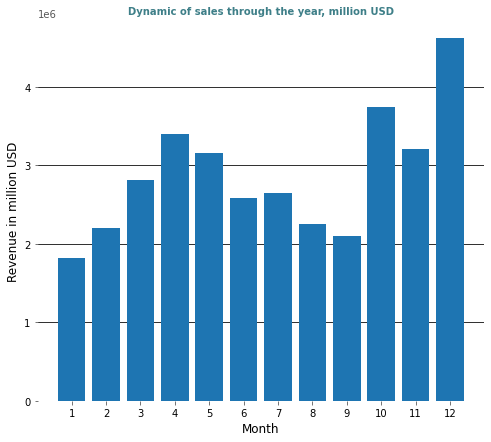

In [174]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.figure(figsize=(8,7))
plt.bar(months, re['Revenue'], color='#1E75B2')
plt.grid(axis='y', color='black')
plt.title('Dynamic of sales through the year, million USD',fontdict={'fontweight':'bold', 'fontsize':10}, color='#3E7F88')
plt.xticks(months, color='black')
plt.yticks(color='black')
plt.ylabel('Revenue in million USD', color='black')
plt.xlabel('Month', color='black')
plt.box()
plt.savefig('Dynamic_of_sales.png', dpi=300, transparent=True)
plt.show()



### Question 2. What city has the highest Revenue?

#### Add City column

In [27]:
file['City'] = file['Purchase Address'].apply(lambda x: x.split(',')[1])
file['State'] = file['Purchase Address'].apply(lambda x: x.split(',')[2].strip())
file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY 10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY 10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY 10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA 94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA 30301


In [28]:
file['State'] = file['State'].apply(lambda x: x.split()[0])
file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA


In [29]:
file['Address'] = file['City'] + ' (' + file['State'] +')'
file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,State,Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta (GA)


In [30]:
city = file.groupby('Address').sum()
city

,Quantity Ordered,Price Each,Month,Revenue
Address,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


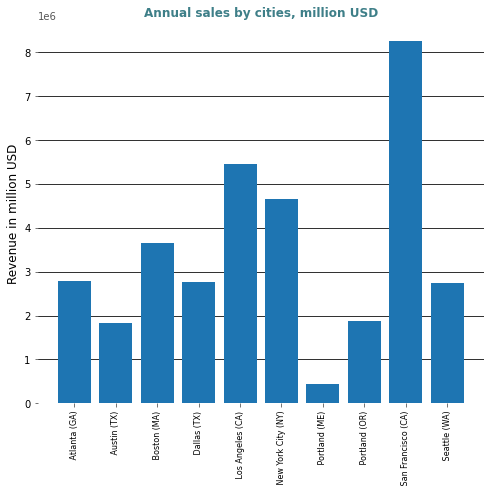

In [183]:
cities = [city for city, df in file.groupby('Address')]

plt.figure(figsize=(8,7))
plt.grid(axis='y', color='black')
plt.bar(cities,city['Revenue'], color='#1E75B2')
plt.xticks(cities, rotation='vertical', size=8, color='black')
plt.yticks(color='black')
plt.ylabel('Revenue in million USD', color='black')
plt.title('Annual sales by cities, million USD', fontdict={'fontweight':'bold', 'fontsize':12}, color='#3E7F88')
plt.box()
plt.savefig('sales_by_cities.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

### Question 3. What time should we display advertisements to maximize likehood of customer's buying product?

In [33]:
file['Hour'] = file['Order Date'].dt.hour
file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,State,Address,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City (NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City (NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City (NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco (CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta (GA),12


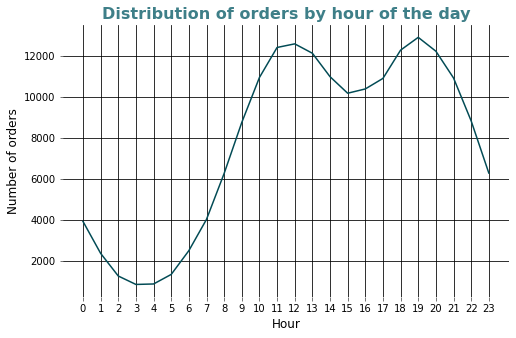

In [177]:
hours = [hour for hour, df in file.groupby('Hour')]
res = file.groupby(['Hour']).count()

plt.figure(figsize=(8,5))
plt.plot(hours, res['Revenue'], color='#024B55')
plt.xticks(hours, color='black')
plt.yticks(color='black')
plt.grid('both', color='black')
plt.box()
plt.xlabel('Hour', color='black')
plt.ylabel('Number of orders', color='black')
plt.title('Distribution of orders by hour of the day', fontdict={'fontweight':'bold', 'fontsize':16},  color='#3E7F88')
plt.savefig('distribution_of_orders.png', dpi=300, transparent=True)

plt.show()


## My recomendation is around 11-12 am and 6-7 pm

### Question 4. What products are most often sold together?

In [35]:
df = file[file['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df [['Order ID', 'Grouped']].drop_duplicates()
df.head()

/var/folders/l4/p69t4r4x6mbg3wdkx4nd0q2r0000gn/T/ipykernel_51120/3552802417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [182]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
for key, value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [37]:
set(file['Product'])

{'20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone'}

### Question 5. What product sold the most?

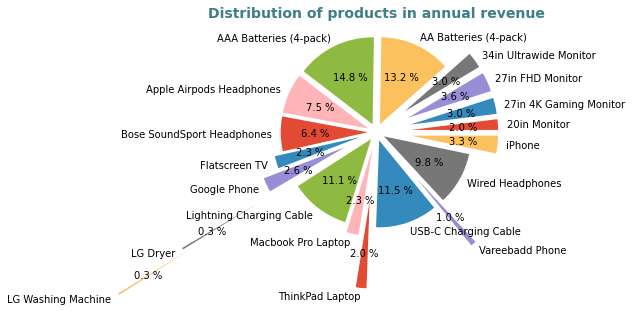

In [184]:
product_group = file.groupby('Product')
product_quantity = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

labels = products

explode=(.4,.4,.4,.4,.1,.1,.1,.1,.2,.4,1.6,2.5,.1,.2,.8,.1,.7,.1,.4)
plt.pie(product_quantity, explode=explode, autopct='%.1f %%', labels=labels)
plt.title('Distribution of products in annual revenue', fontdict={'fontweight':'bold', 'fontsize':14}, color='#3E7F88')
plt.savefig('distribution_of_products.png', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/l4/p69t4r4x6mbg3wdkx4nd0q2r0000gn/T/ipykernel_51120/3461725730.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical',size=8,  color ='black')


<Figure size 720x864 with 0 Axes>

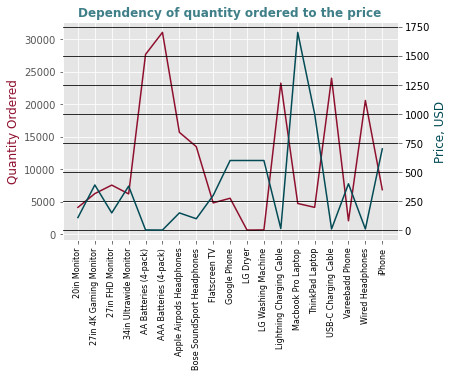

In [180]:
prices = file.groupby('Product').mean()['Price Each']
plt.figure(figsize=(10,12))
fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(products, product_quantity, color='#8F102E')
ax2.plot(products, prices, color='#024B55')

ax1.set_ylabel('Quantity Ordered', color='#8F102E')
ax2.set_ylabel('Price, USD', color='#024B55')
ax1.set_xticklabels(products, rotation='vertical',size=8,  color ='black')
plt.xticks(color ='black')
plt.yticks( color ='black')
plt.grid(axis='both', color ='black')
plt.box()
plt.title('Dependency of quantity ordered to the price', fontdict={'fontweight':'bold', 'fontsize':12}, color='#3E7F88')
plt.savefig('dependency_ordered_price.png', dpi=300, bbox_inches='tight',  transparent=True)
plt.show()


In [40]:
product_group = file.groupby('Product').sum()
product_group['Quantity Ordered'].sort_values(ascending=False).head(5)

Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64

##### This products are best sellers, obviously because of low price per item

### Question 6. How Revenue is distributed between states?

In [41]:
st = file.groupby('State')
states_q = file.groupby('State').count()
states_r = file.groupby('State').sum()['Revenue']
states = [state for state, df in st]
states_r

State
CA    13714774.71
GA     2795498.58
MA     3661642.01
ME      449758.27
NY     4664317.43
OR     1870732.34
TX     4587557.15
WA     2747755.48
Name: Revenue, dtype: float64

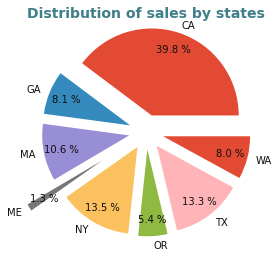

In [181]:
labels = states

plt.style.use('ggplot')
textprops = {"color":'#0e0e0e'}
explode=(.2,.2,.2,.6,.2,.2,.2,.2)
plt.pie(states_r, explode=explode, autopct='%.1f %%', textprops=textprops, pctdistance = 0.8, labels=labels)
plt.title('Distribution of sales by states',  fontdict={'fontweight':'bold', 'fontsize':14}, color='#3E7F88')

plt.savefig('distribution_states.png', dpi=300)
plt.show()

### Question 7. What is the best seller producr in each state?

In [43]:
bs = file.groupby(['State', 'Product'])['Revenue'].sum()
b = file.groupby(['State'])
s = [state for state, df in b]
# for i in s:
#     for j in bs:
        
bs.head(50)

State  Product                   
CA     20in Monitor                   182363.42
       27in 4K Gaming Monitor         960545.37
       27in FHD Monitor               455519.63
       34in Ultrawide Monitor         912355.99
       AA Batteries (4-pack)           42213.12
       AAA Batteries (4-pack)          37001.25
       Apple Airpods Headphones       930900.00
       Bose SoundSport Headphones     544145.58
       Flatscreen TV                  564300.00
       Google Phone                  1323600.00
       LG Dryer                       155400.00
       LG Washing Machine             171000.00
       Lightning Charging Cable       139468.55
       Macbook Pro Laptop            3207900.00
       ThinkPad Laptop               1603983.96
       USB-C Charging Cable           115628.20
       Vareebadd Phone                324400.00
       Wired Headphones                98749.64
       iPhone                        1945300.00
GA     20in Monitor                    37616.58
      